This analysis look into the unemployment of the US economy up until 2010  with an emphasys on the 2008 financial crisis, then will compare the unemployment data with the GDP to see if there is any relantionship

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
path = 'https://assets.datacamp.com/production/course_5226/datasets/ch5_employment.csv'
df=pd.read_csv(path, parse_dates=['datestamp'],index_col = 'datestamp')

In [ ]:
df.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [ ]:
#checking the data types of the dataset
df.dtypes

Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object

In [ ]:
#checking the missing values
df.isnull().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

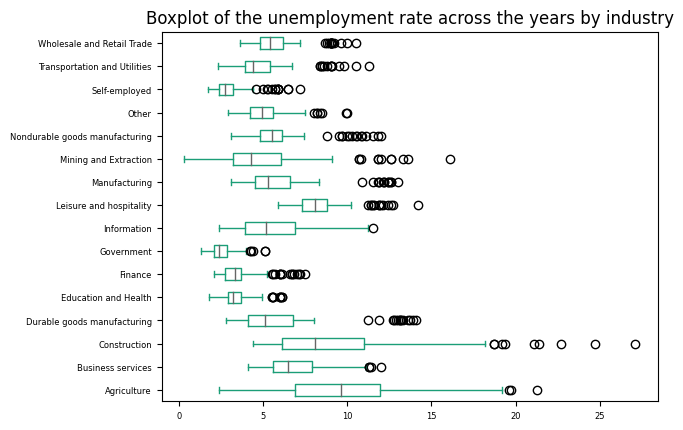

In [ ]:
#creating a boxplot
plt.style.use('default')
ax = df.plot(kind = 'box',fontsize = 6, vert=False, colormap = 'Dark2')
ax.set_title("Boxplot of the unemployment rate across the years by industry")
plt.show()

In [ ]:
#Summary statistics
summary = df.describe()
#the industry with the highest mean unemployment
highest_mean = summary.loc['mean'].sort_values(ascending=False).index[0]
print(f'The industry with the highest mean unemployment rate is {highest_mean}')
#the industry with the highest variability of unemployment
highest_std = summary.loc['std'].sort_values(ascending = False).index[0]
print(f'The industry with the highest variation of unemployment rate is {highest_std}')


The industry with the highest mean unemployment rate is Agriculture
The industry with the highest variation of unemployment rate is Construction


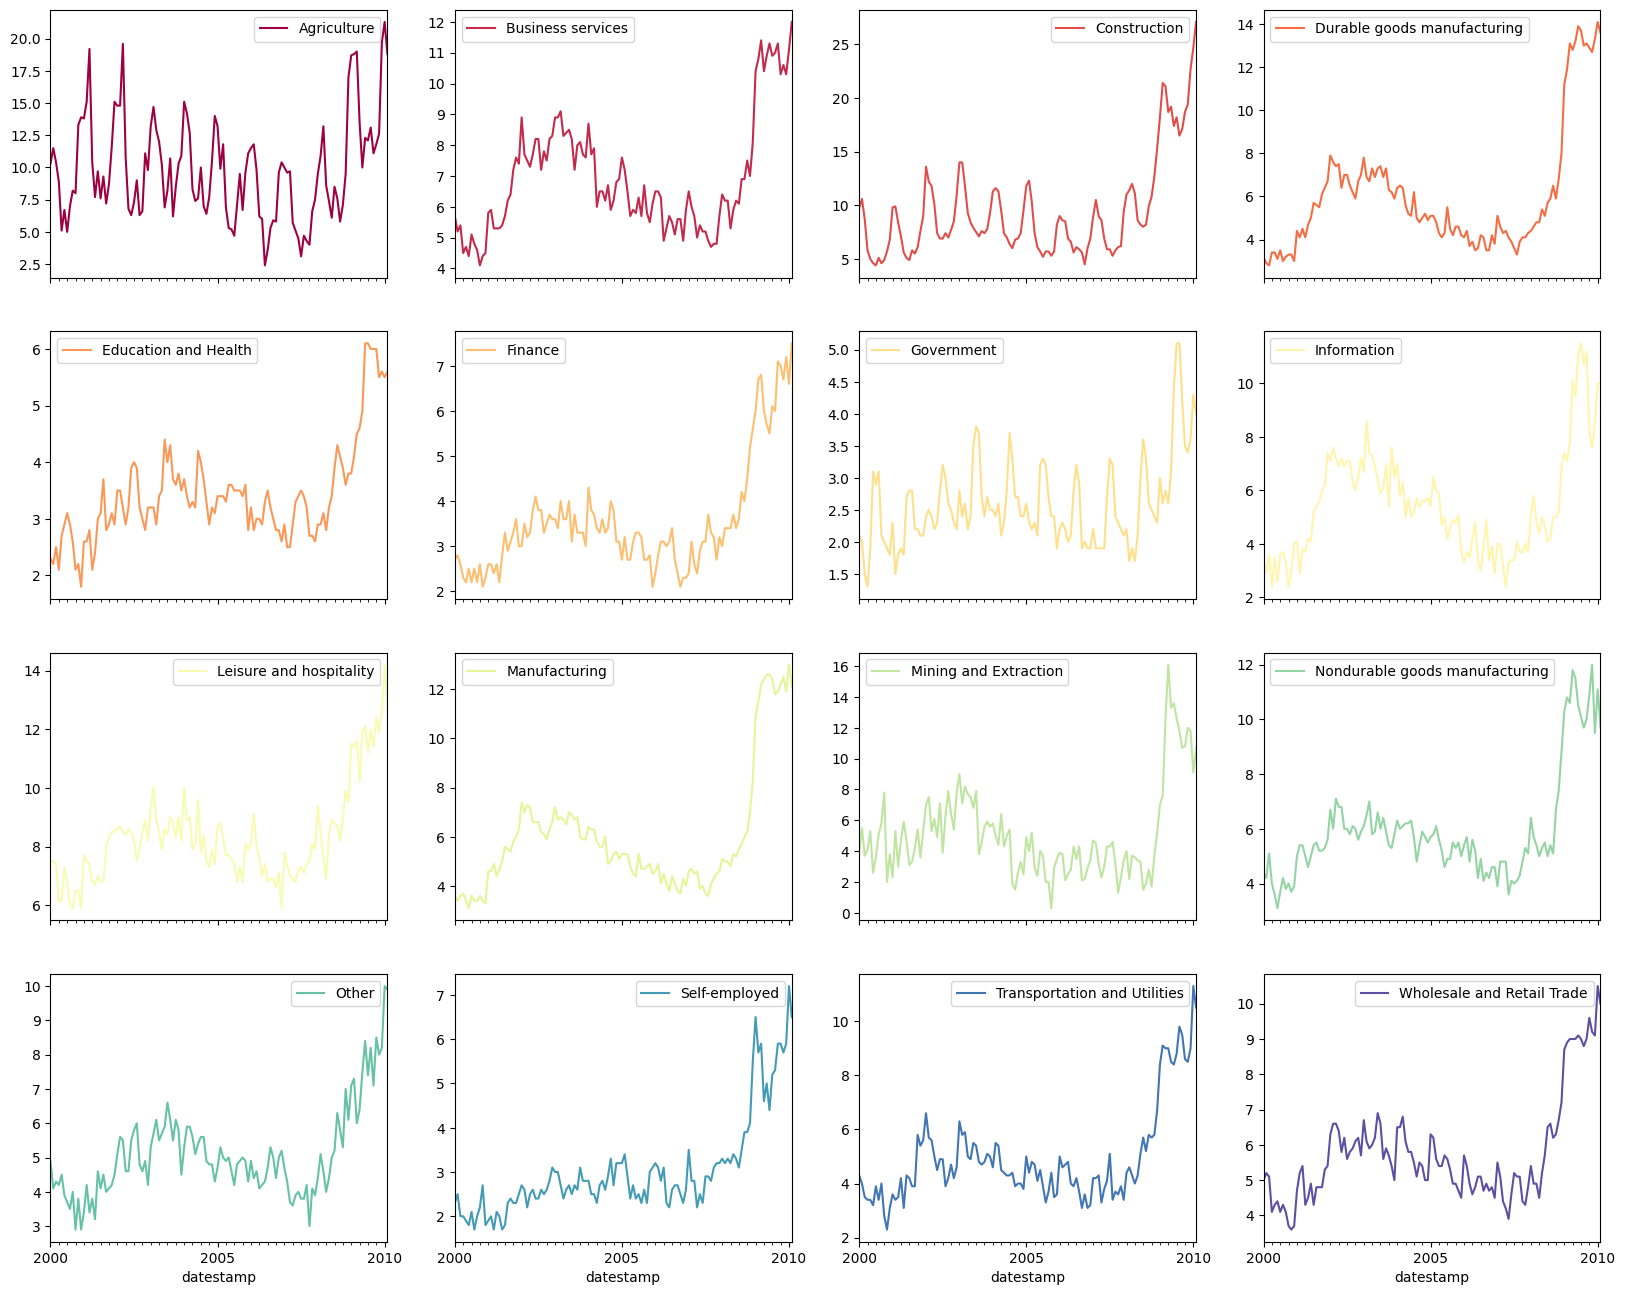

In [ ]:
#Visualizing all the industries in a facetgrid
ax = df.plot(subplots= True,layout=(4,4), figsize = (20,16), sharex = True, sharey = False, colormap = 'Spectral')
plt.xticks(['2000','2005','2010'])
plt.show()

In [ ]:
#Global Unemployment rate
df2 = df.copy()
df2['global'] = df2.mean(axis = 1)

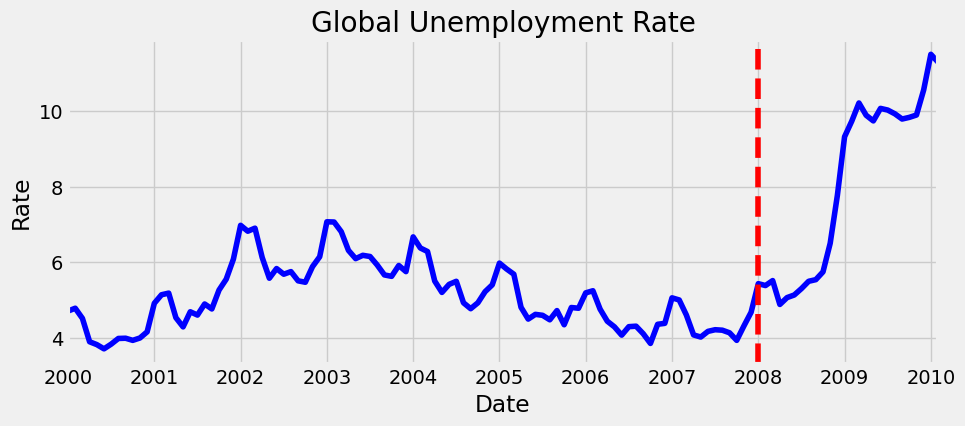

In [ ]:
#ploting the unemployment rate

plt.style.use('fivethirtyeight')
ax2 = df2['global'].plot(color='blue', figsize = (10,4))
ax2.set_xlabel('Date')
ax2.set_ylabel('Rate')
ax2.set_title("Global Unemployment Rate")
ax2.axvline('2008', color = 'red',linestyle = '--')
plt.show()

The subsequent step is going to be a time series decomposition of the unemployment rates by industries




In [ ]:
#creating a dictionary to store the decomposition values
jobs_decomp = {}
#list with the column names
jobs_names = df.columns
#Running time series decomposition on each time series of the DataFrame
#the for loop will go through each column of the data frame and decompose one by one.
#The result will be stored in the dictionary with the key beigh the industry
for job in jobs_names:
  ts_decomposition = sm.tsa.seasonal_decompose(df[job])
  jobs_decomp[job] =ts_decomposition

In [ ]:
#extracting the seasonal value from each industry
jobs_seasonal = {}
#the for loop will iterate through the decomposition of each industry and return the
#seasonal value to the new dictionary
for job in jobs_names:
  jobs_seasonal[job] = jobs_decomp[job].seasonal

#transforming to a Data Frame
seasonality = pd.DataFrame(jobs_seasonal)

In [ ]:
#visualizing the seasonality of the global unemployment rate

decomposition = sm.tsa.seasonal_decompose(df2['global'])


In [ ]:
#ploting the decomposition
#getting the seasonal, trend and global values and joining them into a single Dataframe
decomp = {}
decomp['seasonal'] = decomposition.seasonal
decomp['trend'] = decomposition.trend
decomp['Unemployment'] = df2['global']
decompo = pd.DataFrame(decomp)

In [ ]:
type(decompo.index)

pandas.core.indexes.datetimes.DatetimeIndex

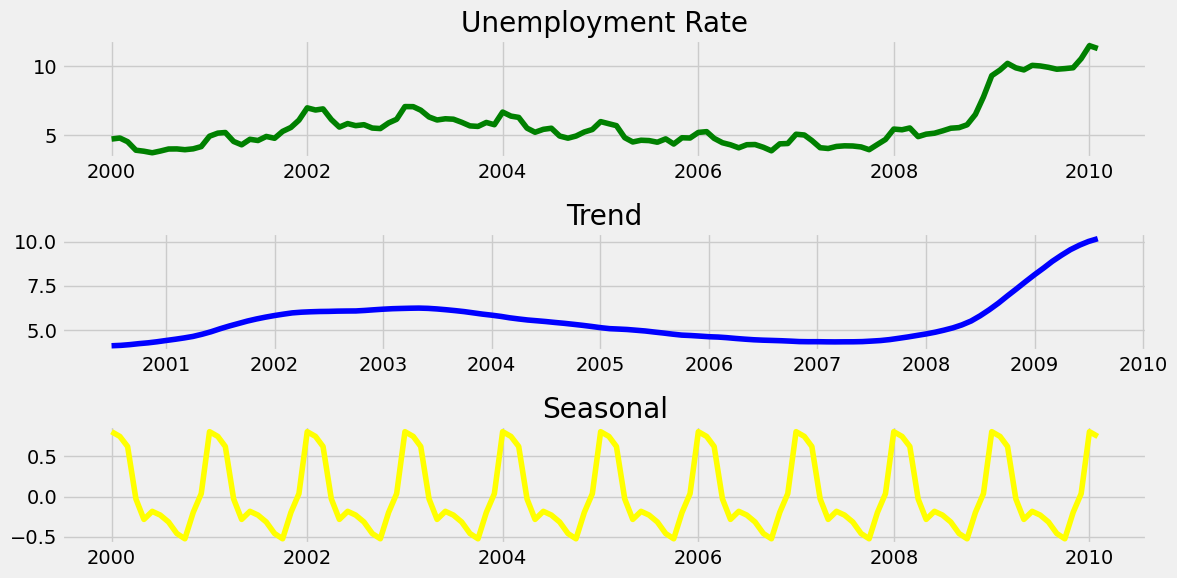

In [ ]:
#ploting the seasonal, trend and unemployment rate
fig4, ax4 = plt.subplots(3,1)
ax4[0].plot(decompo.index, decompo['Unemployment'], color = 'green')
ax4[0].set_title('Unemployment Rate')
ax4[1].plot(decompo.index, decompo['trend'], color = 'blue')
ax4[1].set_title('Trend')
ax4[2].plot(decompo.index, decompo['seasonal'], color = 'yellow')
ax4[2].set_title('Seasonal')
fig4.set_size_inches(12,6)
fig4.tight_layout()
plt.show()

After analysing the graphs the following conclusions can be made about the Unemployment:

*   Seasonality wise, the beginning of the year appears to be when the rate of unemployment is higher
*   There was no clear trend before the year 2008, when the global financial crises occurred, after it there is a clear growing rate of unemployment



In the context of jobs data, it can be interesting to compare seasonality behavior, as this may help uncover which job industries are the most similar or the most different.

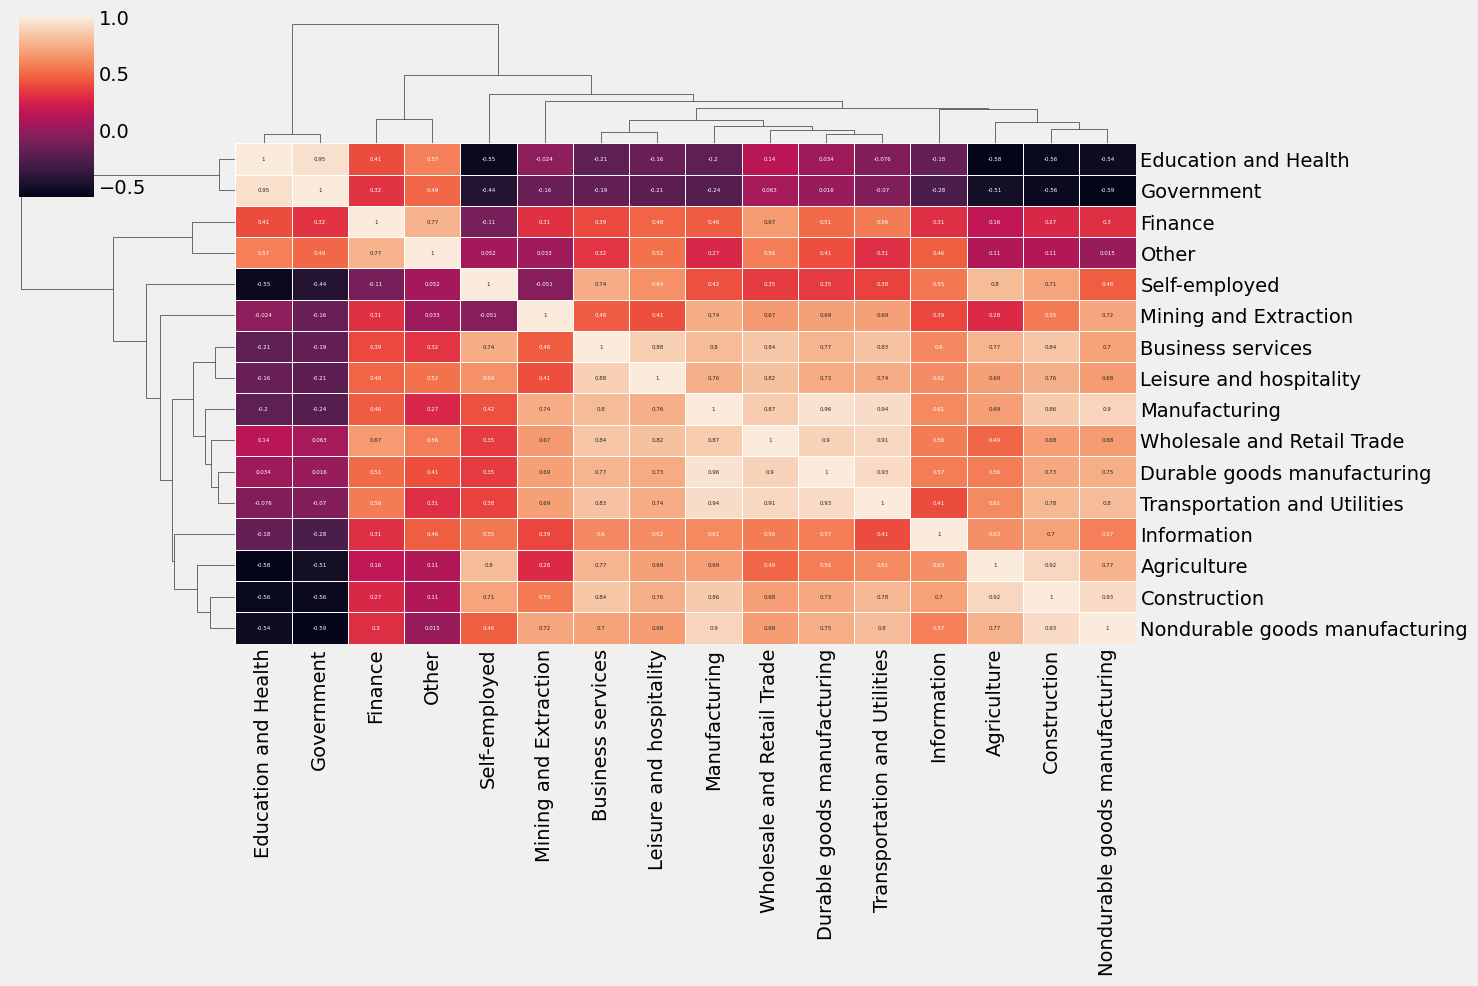

In [ ]:
#correlation matrix of the seasonality
season_corr = seasonality.corr()

#creating a clustermap for the seasonality correlation

fig5 = sns.clustermap(season_corr, annot = True, annot_kws={'size':4}, linewidths=.4,figsize=(15,10))
plt.setp(fig5.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig5.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

An interesting relathionship exists between the unemployment level and the growth rate in a given ywar.

When there's economic growth it's a signal that the agregated demand is increasing, which means the companies will have a more positive outlook on the future and most likely are going to increase their production, and for that they usually have to hire new employess.

A linear regressiona model will be built to analyse this relashionship, the USA gdp was obtained from the FRED Data Base

In [ ]:
import requests

In [ ]:
#setting the parameters for the request
api_key = 'a7f4d56c2b6d4bdccb0d2fd136300a36'
base_url = 'https://api.stlouisfed.org/fred/'
end_point = 'series/observations'
series_id = 'GDPA'
start_date = '1999-01-01'
end_date = '2012-01-01'
#creating the params dictionary

obs_params = {'series_id':series_id,
              'api_key':api_key,
              'observation_start':start_date,
              'file_type':'json',
              'observation_end': end_date}
response = requests.get(base_url+end_point,params = obs_params)

In [ ]:
#formatting the data
if response.status_code == 200:
  res_data = response.json()
  gdp_df = pd.DataFrame(res_data['observations'])
  gdp_df['date'] = pd.to_datetime(gdp_df['date'])
  gdp_df.set_index('date', inplace = True)
  gdp_df['value'] = gdp_df['value'].astype(float)
else:
  print('Failed to retrieve data, status code:', response.status_code)

In [ ]:
#subseting the original data fram to get only relevant data
gdp = pd.DataFrame(gdp_df['value'])

In [ ]:
#creating the percentage change column
gdp['pct_change'] = gdp.pct_change()*100


In [ ]:
gdp.dropna(inplace=True)


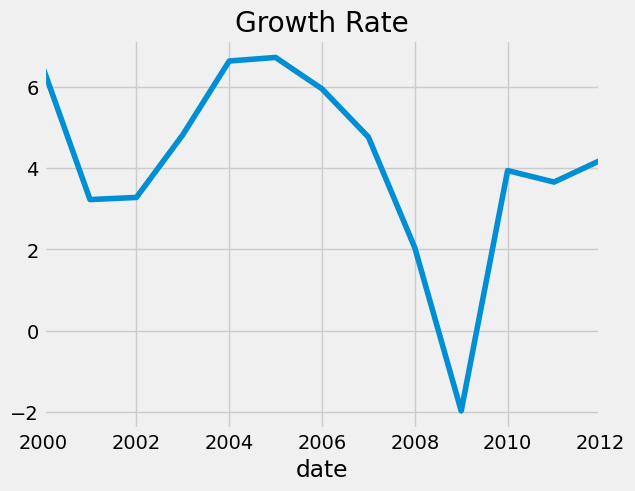

In [ ]:
#plotting the variance of the GDP
ax = gdp['pct_change'].plot()
ax.set_title('Growth Rate')
plt.show()

By analysing the graphic of the growth rate, it is possible to conclude that since 2004 the US economy was experiencing a growth deceleration whith the biggest slope occurring in 2008 when there was a negative growth

In [ ]:
gdp = gdp.loc[:'2010']

In [ ]:
#grouping the unemployment data by year
df2['year'] = df2.index.year
unemployment = df2.groupby('year')['global'].agg(mean = 'mean')



In [ ]:
#transforming the index to datetime
unemployment.index = pd.to_datetime(unemployment.index,format = '%Y')


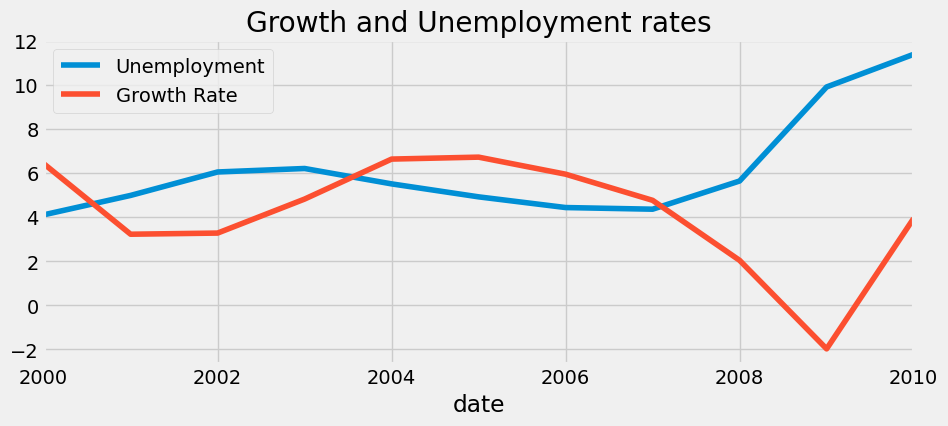

In [ ]:
#visualizing both growth rate and unemployment
fig6, ax6 = plt.subplots(figsize=(10,4))
unemployment['mean'].plot(ax=ax6,legend=True)
gdp['pct_change'].plot(ax=ax6, legend=True)
ax6.legend(labels = ['Unemployment','Growth Rate'])
ax6.set_title('Growth and Unemployment rates')
plt.show()

It's interesting to visualize how the two variables seems to have a negative correlation towards one another

In [ ]:
df3 = pd.DataFrame([gdp['pct_change'], unemployment['mean']]).T
df3.columns = ['Growth rate','Unemployment']
correlation = df3.corr(method = 'pearson')
correlation


,Growth rate,Unemployment
Growth rate,1.000000,-0.587284
Unemployment,-0.587284,1.000000


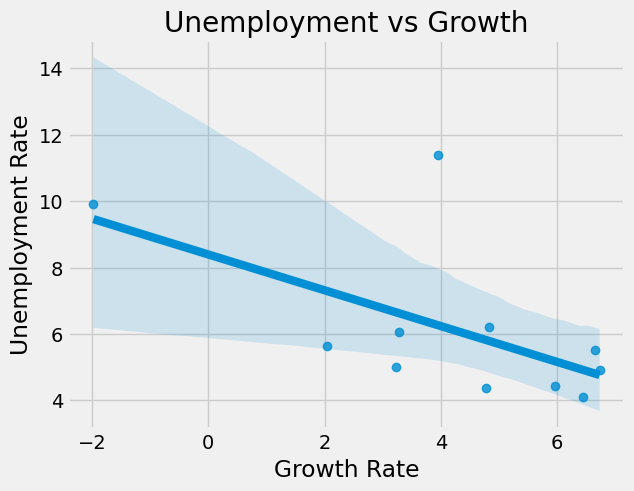

In [ ]:
#plotting the unemployment vs the growth rate
g = sns.regplot(x = gdp['pct_change'], y = unemployment['mean'])
g.set_ylabel('Unemployment Rate')
g.set_xlabel('Growth Rate')
g.set_title('Unemployment vs Growth')
plt.show()